<a href="https://colab.research.google.com/github/JAMES-YI/T09_Keras_Tutorial/blob/main/Image_segmentation_sample_code_20210719.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2019/03/20<br>
**Last modified:** 2020/04/20<br>
**Description:** Image segmentation model trained from scratch on the Oxford Pets dataset.<br>
**Codes from**: <br>
https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/oxford_pets_image_segmentation.ipynb<br>
https://keras.io/examples/vision/oxford_pets_image_segmentation/ <br>
**Modified by**: JYI, 07/19/2021, University of Iowa

# Step: Download the data

In [1]:
!curl -O https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!curl -O https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  755M  100  755M    0     0  10.8M      0  0:01:09  0:01:09 --:--:-- 11.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.2M  100 18.2M    0     0  3331k      0  0:00:05  0:00:05 --:--:-- 4556k


Documentations
- !curl -O https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz, for interacting with URLs and downloading files, https://docs.couchdb.org/en/1.6.x/intro/curl.html
- !tar -xf images.tar.gz, unzip tar.gz file, https://linuxhint.com/linux_tar_command/

ToDos
- try different models 
- try different architectures 
- try different optimizers 
- try different hyperparameters
- try different datasets
- difference between image segmentation in keras and image segmentation in tensorflow
- TXBs on computational image processing, segmentation, imaging, object detection

Tips
- approaches for getting files online: (1) via git in command lines, i.e., ! git clone ....; (2) via wget in command line, i.e., ; (3) via curl in command line, i.e., ! curl -O https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz; 

# Step Directories and paths set up

In [3]:
import os

input_dir = "images/"
target_dir = "annotations/trimaps/"
img_size = (160, 160)
num_classes = 3
batch_size = 32

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 7390
images/Abyssinian_1.jpg | annotations/trimaps/Abyssinian_1.png
images/Abyssinian_10.jpg | annotations/trimaps/Abyssinian_10.png
images/Abyssinian_100.jpg | annotations/trimaps/Abyssinian_100.png
images/Abyssinian_101.jpg | annotations/trimaps/Abyssinian_101.png
images/Abyssinian_102.jpg | annotations/trimaps/Abyssinian_102.png
images/Abyssinian_103.jpg | annotations/trimaps/Abyssinian_103.png
images/Abyssinian_104.jpg | annotations/trimaps/Abyssinian_104.png
images/Abyssinian_105.jpg | annotations/trimaps/Abyssinian_105.png
images/Abyssinian_106.jpg | annotations/trimaps/Abyssinian_106.png
images/Abyssinian_107.jpg | annotations/trimaps/Abyssinian_107.png


In [12]:
"""
JYI - Directory exploration
"""
# print(f"os.listdir(input_dir): {os.listdir(input_dir)}")
# print(f"os.listdir(target_dir): {os.listdir(target_dir)}")
# print(f"sorted(os.listdir(input_dir)): {sorted(os.listdir(input_dir))}")


os.listdir(input_dir): ['havanese_34.jpg', 'British_Shorthair_124.jpg', 'Sphynx_167.jpg', 'Sphynx_192.jpg', 'japanese_chin_87.jpg', 'Russian_Blue_240.jpg', 'shiba_inu_153.jpg', 'Birman_180.jpg', 'Sphynx_235.jpg', 'Bombay_213.jpg', 'english_cocker_spaniel_199.jpg', 'Siamese_237.jpg', 'yorkshire_terrier_99.jpg', 'english_cocker_spaniel_173.jpg', 'german_shorthaired_59.jpg', 'american_pit_bull_terrier_144.jpg', 'Abyssinian_215.jpg', 'boxer_200.jpg', 'great_pyrenees_25.jpg', 'basset_hound_60.jpg', 'boxer_126.jpg', 'havanese_112.jpg', 'yorkshire_terrier_71.jpg', 'Birman_115.jpg', 'japanese_chin_43.jpg', 'beagle_164.jpg', 'shiba_inu_42.jpg', 'Birman_28.jpg', 'Egyptian_Mau_16.jpg', 'Persian_107.jpg', 'miniature_pinscher_47.jpg', 'Bombay_122.jpg', 'pug_153.jpg', 'wheaten_terrier_66.jpg', 'pug_184.jpg', 'leonberger_143.jpg', 'Bengal_157.jpg', 'samoyed_160.jpg', 'american_bulldog_14.jpg', 'Birman_45.jpg', 'Ragdoll_106.jpg', 'British_Shorthair_54.jpg', 'chihuahua_6.jpg', 'Persian_82.jpg', 'Egypti

Tips
- only the input image and output map paths are loaded. Input images and output maps will be loaded only when they are needed in a batch.

Documentations
- sorted, sorting iterable, https://docs.python.org/3/howto/sorting.html
- os.listdir, get all the file names in a directory, https://www.geeksforgeeks.org/python-os-listdir-method/#:~:text=listdir()%20method%20in%20python,working%20directory%20will%20be%20returned.
- 

# Step Data exploration

Documentations
- IPython.display.display, similar to print in terminal IPython,  https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html
- IPython.display.Image, create an image object from a url, raw data, file path etc, https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html
- tensorflow.keras.preprocessing.image.load_img, load data in PIL format, https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img
- PIL.ImageOps.autocontrast, https://pillow.readthedocs.io/en/stable/reference/ImageOps.html
- tensorflow.keras.preprocessing.image.img_to_array, convert PIL image object to np.ndarray, https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/img_to_array

Tips
- when running python script via linux command, the IPython can send the data to frontend
- 

ToDos
- what python objects can be displayed? 


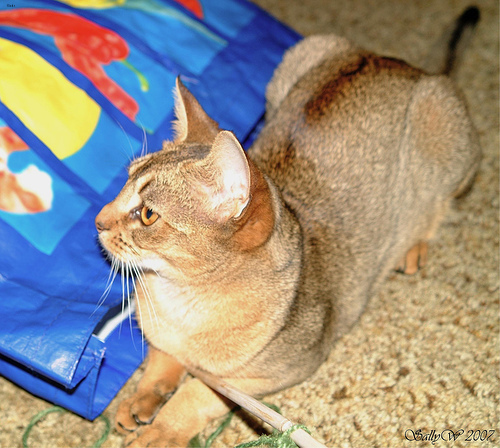

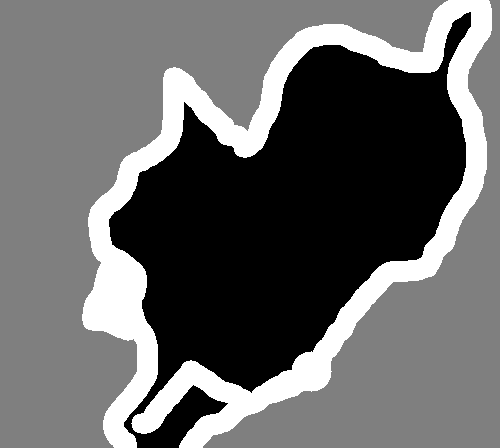

In [4]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import PIL
from PIL import ImageOps

# Display input image #7
display(Image(filename=input_img_paths[9]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[9]))
display(img)

Tips
- PIL and matplotlib libraries can both be used to convert between np.ndarray and image, https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays
- tensorflow.keras.preprocessing.image.img_to_array can convert PIL image object to np.ndarray


ToDos
- how to convert IPython image object into np.array?


In [6]:
# import numpy as np
# JIMG = Image(filename=input_img_paths[9]) # return an image object
# print(JIMG)
# print(f"JIMG file name:{JIMG.filename}")
# print(f"IMG format:{JIMG.format}")
# print(f"np.asarray (JIMG.data):{np.asarray(JIMG.data)}")

# # JIMG = display(Image(filename=input_img_paths[9])) # no return
# # print(JIMG)

# JIMG = load_img(target_img_paths[9])
# print(f"JIMG: {JIMG}")
# print(f"JIMG.getdata: {JIMG.getdata()}")
# print(f"img_to_array(JIMG)[0]: {img_to_array(JIMG)[0]}")
# print(f"np.array(JIMG)[0]: {np.array(JIMG)[0]}")
# print(f"np.asarray(JIMG)[0]: {np.asarray(JIMG)[0]}")

# JIMG = PIL.ImageOps.autocontrast(load_img(target_img_paths[9]))
# print(f"np.array(JIMG)[0]: {np.array(JIMG)[0]}")

<IPython.core.display.Image object>
JIMG file name:images/Abyssinian_107.jpg
IMG format:jpeg
np.asarray (JIMG.data):b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\x96\x00\x96\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x03\x02\x02\x02\x02\x02\x04\x03\x03\x02\x03\x05\x04\x05\x05\x05\x04\x04\x04\x05\x06\x07\x06\x05\x05\x07\x06\x04\x04\x06\t\x06\x07\x08\x08\x08\x08\x08\x05\x06\t\n\t\x08\n\x07\x08\x08\x08\xff\xdb\x00C\x01\x01\x01\x01\x02\x02\x02\x04\x02\x02\x04\x08\x05\x04\x05\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\xff\xc0\x00\x11\x08\x01\xc0\x01\xf4\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x02\x02\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x06\x07\x05\x08\x04\t\x02\x03\n\x01\x00\x0b\xff\xc4\x00J\x10\x00\x01\x03\x03\x02\x04\x04\x04\x02\t\x03\x04\x00\x05\x0

# Step Prepare `Sequence` class to load & vectorize batches of data

In [5]:
"""
JYI - define a data loading class
"""
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img


class OxfordPets(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        """get the number of batch"""
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            y[j] = np.expand_dims(img, 2)
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            y[j] -= 1
        return x, y


Documentations
- keras.utils.Sequence, for fitting a dataset, https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence
- (self.batch_size,) + self.img_size + (3,), expand dimensions, e.g., (self.batch_size, self.image_size,3)

Tips
- keras.utils.Sequence class must have __len__ and __getitem__ methods
- when loading a batch of data, the batch data paths are first extracted, and then the corresponding data is loaded
- the images are resized when loaded via load_img

# Step Define U-Net Xception-style model

Documentations
- keras.Input, instantiate keras.Input objects which are needed as keras.layers.Model, https://keras.io/api/layers/core_layers/input/,
- layers.keras.Conv2D, https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
- layers.BatchNormalization, https://keras.io/api/layers/normalization_layers/batch_normalization/
- layers.Activation, https://keras.io/api/layers/activations/, https://keras.io/api/layers/activation_layers/
- keras.backend.clear_session, clear previously defined models or computational graphs, https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session
- layers.SeparationConv2D, for speed up convolution computation, https://www.tensorflow.org/api_docs/python/tf/keras/layers/SeparableConv2D, https://towardsdatascience.com/a-basic-introduction-to-separable-convolutions-b99ec3102728
- layers.MaxPooling2D, https://keras.io/api/layers/pooling_layers/max_pooling2d/ 
- layers.add, mathematical addition, https://www.tensorflow.org/api_docs/python/tf/keras/layers/Add
- layers.Concatenate, concatenate two tensors, https://keras.io/api/layers/merging_layers/concatenate/
- layers.Conv2DTranspose, inverse operation of layers.Conv2dTranpose, https://datascience.stackexchange.com/questions/26451/how-to-calculate-the-output-shape-of-conv2d-transpose
- layers.UpSampling2D, repetition or matrep in matlab, https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D
- keras.Model, groups layers to an object with training and inference attributes, https://keras.io/api/models/model/#model-class, https://www.tensorflow.org/api_docs/python/tf/keras/Model


Tips
- how to design residual blocks: (1) keep number of filters the same within the block; (2) keep the image size unchnaged within
  a block; (3) separate variable for storing residual from previous block; (4) multiple consecutive relu is the same as single relu; 
  (5) residual from previous block is added to the output of current block, and the sum is the residual of current block; 
- model construction in keras: (1) when the model is sequential with only one branch, ; (2) the model has multiple branches,
- dimensions involved in layers.Conv2D: (1)the input_shape argument in layers.Conv2D should not contain the batch size; (2) In tf.keras.layers.Conv2D(2, 3, activation='relu', input_shape=input_shape[2:])(x), the first two dimensions in input_shape are used as batch size, and the third up to the last dimension in input_shape are used as sample size; (3) the batch size does not need to be scalar; 
- no padding in layers.Conv2D if 'valid', and with padding if 'same'
- any keras tensor can be used as the input and output arguments in layers.Model
- in layers.Conv2D, the activation function can be defined when instantiate the convoltuonal layer --> we cannot get the learned representation before the activation
- in y=Wx+b: (1) kernel_regularizer acts on w & bias_regularizer acts on b & activity_regularizer acts on y; (2) bias_regularizer encourages to pass through origin; (3) [ref 1](https://stats.stackexchange.com/questions/383310/what-is-the-difference-between-kernel-bias-and-activity-regulizers-and-when-t), [ref 2](https://keras.io/api/layers/regularizers/), [ref 3](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers)
- regularizers are functions of its input arguments & constraints are conditions which require its input arguments to satisfy [ref 1](https://github.com/tensorflow/tensorflow/blob/v2.5.0/tensorflow/python/keras/constraints.py#L124-L131) [ref 2](https://keras.io/api/layers/constraints/)
- when setting up the activation function in a layer: (1) we can directly set the activation argument as 'relu'; (2) or we can set the activation argument to a activations.relu; 
- after execution of an activation function over a numerical tensor, we can use tf.keras.activations.relu(foo, alpha=0.5).numpy() to get the output in numpy.darray format;  
- activation functions: (1) softplus, a differentiable approximation of relu, function value cannot be negative; (2) softsign, approximation of tanh, larger graident when near 0 & smaller gradient when far from 0 when compared with tanh; (3) selu, approximation for relu, nonzero and nonfixed gradient on the negative half & nonzero function value; (4) elu, differentiable approximation of relu & function value can be negative; 
- working mechanism of SeparationConv2D: (1) for given input of size (BN=1, W, H, C), conventional conv2d with 256 filters of size 3 by 3 & each filter is actually (3,3,C) and performs convolution with input to get (BN=1,W', H', 1) & 256 filters will give 256 outputs of shape (BN=1, W', H', 1) & concatenate to get (BN=1,W',H',256); (2) for given input of size (BN=1, W, H, C), for separable conv2d with 256 filters of size 3 by 3 & each filter has actually C subfilters of size (3,3,1) can perform & each subfilter performs convolution with only one channel of the input, and thus (BN=1, W', H', C) after all the subfilters are used & use filters of size (1,1) or actually (1,1,C) to perform convolution with (BN=1, W', H', C) to get (BN=1, W', H', 1) & 256 such process can get us 256 such (BN=1, W', H', 1) and stack them together to get the final convolution output;  
- output dim and input dim relation: (1) in convolution, opt_dim = (ipt_dim-flt_dim)/stride + 1; (2) in transposed convolution, opt_dim = (ipt_dim-1)*stride + fil_dim; (3) same formulation but inverse functions [ref 1](https://datascience.stackexchange.com/questions/26451/how-to-calculate-the-output-shape-of-conv2d-transpose)
- the input and output of layers.UpSampling2D should be 4D tensors, and the repetition only works on weight and height
- when group layers into an object, only the input and output objects are needed to feed to keras.Model & the keras.Model will automatically group all the corresponding layers
- batch normalization: (1) in bactch normalization, the average and the mean computed over all the batch samples; (2) when interpreting batch normalization, it's better understood by taken into consideration the layer just before. The goal of batch normalization is to try to make the output of each neuron in the previous layer follow a Gaussian distribution; (3) for a convolution layer, each neural has a filter, and it has more than just one output as it visits different regions in an image. Ideally, for each such output, the mean and the variance over all the samples in a batch are calculated. Thus if we have filter_num filters, and each filter gives an output of shape (W,H), then there will be filter_num*W*H features, thus we have 2*W*H training variables for each filter. This means too many training parameters; (4) one way to reduce the number of trainable variables, is to let the neural network to learn one set of the mean and variance or beta and gamma for each filter. In this way, we can have only 2*filter_num trainable variables;
- computation of transpose convolution 2d: (1) at each location in the input image, the value at that location will first multiply with the kernel, and then the results are directly put in the output. Then for the next location in the input image, the value at that locaiton will first multiply again with the kernel, and then the results are directly put in the output. If there is a specific stride, then when pasting the kernel in the output, we need to shift some pixels; [ref 1](https://d2l.ai/chapter_computer-vision/transposed-conv.html)
- relation between the input and output shapes of layers.UpSampling2D: (1) the scaling factor only works on the H and W --> if input is of shape (BN, W,H, C), then upsampling2d with scaling factor (sW,sH) will give output of shape (BN,W*sW,H*sH,C); 
- comparisons between ResNet architecture and u-net architecture: (1) resnet keeps information from previous layer by adding previous representation to current representation, while u-net achieves this by directly concatenating the representations; (2) the primary goal of resnet is to make training of very deep neural networks possible, while unet is primarily targeted at making use of low level features for later tasks;
- comparison between layers.UpSampling2D: (1)both of layers.UpSampling2D and layers.Conv2DTranspose have the upsampling effects; (2) layers.UpSampling2D achieves this by repetition, while layers.Conv2DTranpose achieves this by deconvolution; 


Documentations
- keras.Model, https://www.tensorflow.org/api_docs/python/tf/keras/Model

Tips
- keras.Model objects configuration: (1) use model.compile() to config loss function, optimizer and metric; (2) use model.fit() to train the model; (3) use model.predict() to make a prediction; (4) use model.call() to get output for input; 
- difference between model.call() and model.fit()
- difference between model.evaluate() and model.predict(): (1) model.evaluate() will evaluate the model performance over testing data & both iput and output are required; (2) 
- you can start with keras.Model to figure out every step in deep learning practice; 
- batch normalization [ref 1](https://stackoverflow.com/questions/42521005/how-the-number-of-parameters-associated-with-batchnormalization-layer-is-2048)
- the padding modes in different layers can have different meanings: (1) in maxpooling2D, floor((input_dim - pool_size)/stride) + 1 if valid mode, or floor((input_dim-1)/stride) + 1 if same mode; (2) in conv2D, (input_dim-filter_size)/stride+1 if valid mode, or input_dim if same mode; (3) in conv2dTranspose, the padding has the same meaning as that in conv2D [ref 1](https://keras.io/api/layers/pooling_layers/max_pooling2d/); 

In [6]:
from tensorflow.keras import layers

def get_model_small(img_size, num_classes):
    """
    JYI
    - return a model or a computational graph
    - simplified version of get_model
    """
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x) # no input arguments are needed for initialization of BatchNormalization layer
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    """
    - during all the residual blocks, the image size is not changed before calling maxpooling2d
    """
    for filters in [64, 128]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###
    """
    - during each upsampling block, the image size is unchanged before the layers.UpSampling2D is used
    """

    for filters in [128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model_small(img_size, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 80, 80, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 80, 80, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 80, 80, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [8]:
from tensorflow.keras import layers

def get_model(img_size, num_classes):
    """
    JYI
    - return a model or a computational graph
    - this model can be too big for demonstration
    """
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x) # no input arguments are needed for initialization of BatchNormalization layer
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    """
    - during all the residual blocks, the image size is not changed before calling maxpooling2d
    """
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###
    """
    - during each upsampling block, the image size is unchanged before the layers.UpSampling2D is used
    """

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 80, 80, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 80, 80, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 80, 80, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

Tips
- conv2d (Conv2D): 32*(3*3*3) + 32
- batch_normalization (BatchNorma: 32*4, but only 32*2 trainable parameters
- separable_conv2d (SeparableConv: 32*(3*3*1) + 64*(1*1*32) + 64    
- how to setup the axis in bactch normalization layer, 0, 1, 2, 3, 4, -1? default is -1, i.e., for each filter or neuron, do the batch normalization over the samples in a batch
- how to tell the connection of different network layers from summary? Better draw the computational graph for yourself   
- better get yourself used to how to manipulate models or computational graphs [ref 1](https://www.tensorflow.org/api_docs/python/tf/keras/Model) 

ToDos
- how to access specific layers, its attributes, and methods?
- motivation for projecting residual 
- how to extract intermediate layer outputs
- what's dilation rate in layers.Conv2D
- in residual blocks where the "same" padding mode is used, the convolution keeps performing over meaningless regions?






In [ ]:
"""
JYI - model exploration
"""



# Step Set aside a validation split

In [7]:
import random

# Split our img paths into a training and a validation set
val_samples = 1000
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

# Instantiate data Sequences for each split
train_gen = OxfordPets(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

Documentations
- random.Random,

ToDos
- review and implementation of commonly used neural network architectures
- read https://arxiv.org/abs/1605.07678


Tips
- https://towardsdatascience.com/neural-network-architectures-156e5bad51ba
- https://arxiv.org/abs/1605.07678


Commonly used network network architectures
- LeNet5, image features are highly spatially correlated and using individual pixels of image does not exploit the correlation well
- Inception-v3, Inception-v4
- DenseNet-201, DenseNet-169, DenseNet-121
- ResNet-34, ResNet-50, ResNet-101, ResNet-121, ResNet-152
- VGG-16, VGG-19
- MobileNet-v1, MobileNet-v2
- GoogLeNet
- ENet
- fd-MobileNet
- BN-NIN
- ShuffleNet
- SqueezeNet
- BN-AlexNet
- AlexNet
- Xception
- 

Important 


# Step Train the model from scratch

Documentations
- keras.callbacks.ModelCheckpoint
- running time: 3h for 6 epoch

ToDos
- customized layer, 
- customized connection, 
- customized loss, 
- customized optimizer, 
- save model
- load model
- optimization with pretrained models
- warm start training
- 


In [ ]:
# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.h5", save_best_only=True)
]

# Train the model, doing validation at the end of each epoch.
epochs = 15
model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)

Epoch 1/15
140/199 [====================>.........] - ETA: 6:41 - loss: 0.9240

# Step Visualize predictions

In [ ]:
# Generate predictions for all images in the validation set

val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)
val_preds = model.predict(val_gen)


def display_mask(i):
    """Quick utility to display a model's prediction."""
    mask = np.argmax(val_preds[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    display(img)


# Display results for validation image #10
i = 10

# Display input image
display(Image(filename=val_input_img_paths[i]))

# Display ground-truth target mask
img = PIL.ImageOps.autocontrast(load_img(val_target_img_paths[i]))
display(img)

# Display mask predicted by our model
display_mask(i)  # Note that the model only sees inputs at 150x150.

# Step Model evaluation

ToDos
- evaluation metrics for image segmentation
- 